IMPORT REQUIRED LIBRARIES

In [21]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import sys
print(sys.executable)
print(sys.path)


C:\Users\ROSHINI\AppData\Local\Programs\Python\Python313\python.exe
['C:\\Users\\ROSHINI\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'C:\\Users\\ROSHINI\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'C:\\Users\\ROSHINI\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'C:\\Users\\ROSHINI\\AppData\\Local\\Programs\\Python\\Python313', '', 'C:\\Users\\ROSHINI\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages']


In [9]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.1 MB 11.6 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 11.1 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.3 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 9.8 MB/s eta 0:00:00

   ---------------------------------------- 0/6 [pyparsing]
   ---------------------------------------- 0/6 [pyparsing]
   ------ --------------------------------- 1/6 [kiwisolver]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import numpy as np 
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM ,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

STEP2: LOAD DATASET

In [38]:
import os
print(os.getcwd())
print(os.listdir())


C:\Users\ROSHINI\Desktop\project 1
['.ipynb_checkpoints', 'human+activity+recognition+using+smartphones', 'Untitled.ipynb', 'X_test.txt', 'X_train.txt', 'y_test.txt', 'y_train.txt']


In [49]:
# Load train and test data
X_test = np.loadtxt('X_test.txt')
X_train = np.loadtxt('X_train.txt')

y_test = np.loadtxt('y_test.txt').astype(int)
y_train = np.loadtxt('y_train.txt').astype(int)

# print("Test data shape:", X_test.shape)
# print("Train data shape:", X_train.shape)
print("Original X_train shape:", X_train.shape)
print("Original X_test  shape:", X_test.shape)
print("y_train_raw shape:", y_train.shape)
print("y_test_raw  shape:", y_test.shape)


Original X_train shape: (7352, 561)
Original X_test  shape: (2947, 561)
y_train_raw shape: (7352,)
y_test_raw  shape: (2947,)


STEP 3: RESHAPE DATA FOR LSTM

In [50]:
# After loading

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test  = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("Reshaped X_train shape:", X_train.shape)  # e.g., (7352,1,561)
print("Reshaped X_test  shape:", X_test.shape)


# print("Train data shape:", X_train.shape)
# print("Test  data shape:",  X_test.shape)

# # DO NOT reshape like this:
# # X_train = X_train.reshape((X_train.shape[0],128, int(X_train.shape[1]/128)))
# # X_test  = X_test.reshape((X_test.shape[0],128, int(X_test.shape[1]/128)))

# # Instead:
# input_shape = X_train.shape[1]  # e.g., 561
# print("Using input shape for model:", input_shape)




Reshaped X_train shape: (7352, 1, 561)
Reshaped X_test  shape: (2947, 1, 561)


STEP 4: ENCODE OUTPUT LABELS

In [51]:
# convert acitivity labels to categorical 
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # gives 1D array
y_test_enc  = le.transform(y_test)

print("Classes (numeric):", le.classes_)  

y_train = to_categorical(y_train_enc)
y_test  = to_categorical(y_test_enc)

print("y_train one-hot shape:", y_train.shape)  
print("y_test  one-hot shape:",  y_test.shape)   





# le = LabelEncoder() 
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test) 

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test) 

# print("labels encoded sucessfully")
# print("Activities:", le.classes_)

Classes (numeric): [1 2 3 4 5 6]
y_train one-hot shape: (7352, 6)
y_test  one-hot shape: (2947, 6)


STEP 5: BUILD THE LSTM MODEL

In [52]:
# checking the shape of X_train before building the model:
print("X_train shape:", X_train.shape)


X_train shape: (7352, 1, 561)


In [59]:
timesteps = X_train.shape[1]   # = 1
features  = X_train.shape[2]   # = 561
n_classes = y_train.shape[1]   # e.g., 6

model = Sequential([
    LSTM(128, input_shape=(timesteps, features), return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()





# from tensorflow.keras import Input
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense

# model = Sequential([
#     Input(shape=(timesteps, features)),        # <— explicit input layer
#     LSTM(128, return_sequences=True),
#     Dropout(0.5),
#     LSTM(64),
#     Dropout(0.5),
#     Dense(64, activation='relu'),
#     Dense(n_classes, activation='softmax')
# ])


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                       │ (None, 1, 128)              │         353,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,238 (1.55 MB)

 Trainable params: 407,238 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

STEP 6: TRAIN THE MODEL

In [64]:
history = model.fit(X_train, y_train , batch_size = 64, validation_split =0.2 ,epochs=30, verbose = 1)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8223 - loss: 0.4087 - val_accuracy: 0.9252 - val_loss: 0.2131
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8777 - loss: 0.2877 - val_accuracy: 0.9279 - val_loss: 0.1785
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9152 - loss: 0.2062 - val_accuracy: 0.9232 - val_loss: 0.2544
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9274 - loss: 0.1838 - val_accuracy: 0.9415 - val_loss: 0.1433
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9378 - loss: 0.1618 - val_accuracy: 0.9415 - val_loss: 0.1509
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9473 - loss: 0.1390 - val_accuracy: 0.9470 - val_loss: 0.1121
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9520 - loss: 0.1348 - val_accuracy: 0.9402 - val_loss: 0.1425
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9517 - loss: 0.1348 - val_accuracy: 0.9395 - v

STEP 7: EVALUATE THE MODEL

In [67]:
loss , accuracy = model.evaluate(X_test , y_test , verbose = 0)
print(f"test accuracy: {accuracy * 100:.2f}%")

test accuracy: 93.99%


STEP 8: PLOT TRAINING PERFORMANCE

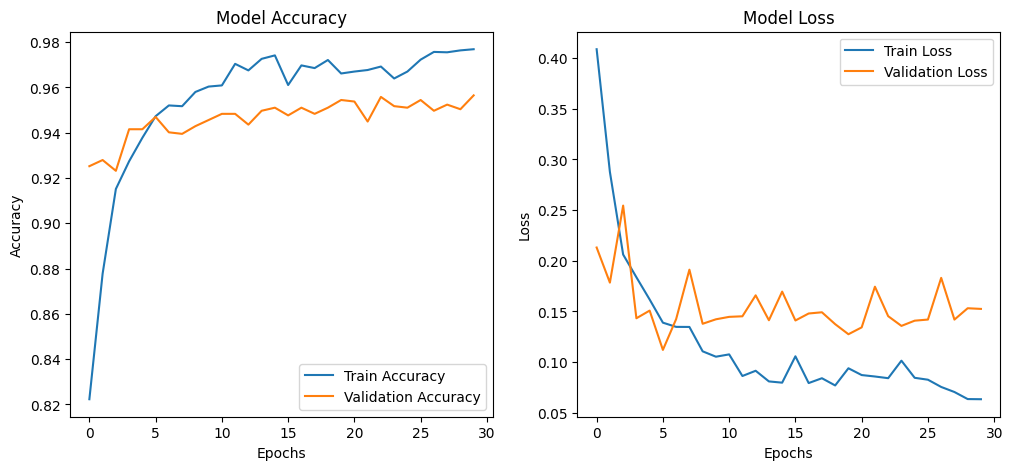

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [71]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


CONFUSTIOON MATRIX AND CLASSIFICATION REPORT

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


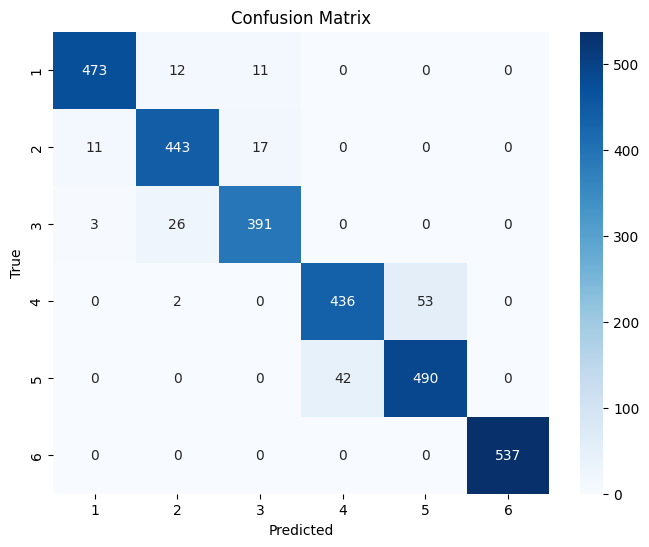


📜 Classification Report:

              precision    recall  f1-score   support

           1       0.97      0.95      0.96       496
           2       0.92      0.94      0.93       471
           3       0.93      0.93      0.93       420
           4       0.91      0.89      0.90       491
           5       0.90      0.92      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



In [72]:
# Evaluate Model Prediction

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📜 Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=[str(x) for x in le.classes_]))

SAVE THE MODEL 